In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#import excel data
data=pd.read_excel(r"operations.xlsx")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Date,Service Type,Fuel Supplier,Customer,Ticket #,Flight No.,Origin,Destination,A/C Reg.,A/C Type,...,On-Blocks Time Type,Serv. Start,Serv. Start Time Type,Dur.,Serv. End,Serv. End Time Type,Off-Blocks,Off-Blocks Time Type,Flt. Stat.,Status
1,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333083,AC0133,YYZ,YYC,CGMIU,7M8,...,Actual,2022-10-16 05:17:13,Actual,22m,2022-10-16 05:39:59,Actual,2022-10-16 06:36:00,Actual,OFB,Completed
2,2022-10-16 00:00:00,Fuel,WestJet,WSW - Swoop Airlines,334608,WO0315,YYZ,YLW,CGXRW,7M8,...,Actual,2022-10-16 06:02:05,Actual,23m,2022-10-16 06:25:54,Actual,2022-10-16 06:56:00,Actual,OFB,Completed
3,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333090,AC0185,YYZ,YVR,CFLKX,321,...,Actual,2022-10-16 06:46:59,Actual,32m,2022-10-16 07:18:53,Actual,2022-10-16 07:33:00,Actual,OFB,Completed
4,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333182,AC1121,YYZ,YXE,CGEOJ,7M8,...,Actual,2022-10-16 07:29:49,Actual,25m,2022-10-16 07:54:42,Actual,2022-10-16 08:22:00,Actual,OFB,Completed


In [4]:
# make first row as a header
new_header= data.iloc[0]
data=data.iloc[1:]
data.columns= new_header

In [16]:
# Drop columns with NaN values
data = data.dropna(axis=1)
data.head()

,Date,Service Type,Fuel Supplier,Customer,Ticket #,Flight No.,Origin,Destination,A/C Reg.,A/C Type,...,Serv. Start,Serv. Start Time Type,Dur.,Serv. End,Serv. End Time Type,Off-Blocks,Off-Blocks Time Type,Status,Time Difference (minutes),Time Difference (rounded minutes)
1,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333083,AC0133,YYZ,YYC,CGMIU,7M8,...,2022-10-16 05:17:13,Actual,22m,2022-10-16 05:39:59,Actual,2022-10-16 06:36:00,Actual,Completed,56.016667,56
2,2022-10-16 00:00:00,Fuel,WestJet,WSW - Swoop Airlines,334608,WO0315,YYZ,YLW,CGXRW,7M8,...,2022-10-16 06:02:05,Actual,23m,2022-10-16 06:25:54,Actual,2022-10-16 06:56:00,Actual,Completed,30.100000,30
3,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333090,AC0185,YYZ,YVR,CFLKX,321,...,2022-10-16 06:46:59,Actual,32m,2022-10-16 07:18:53,Actual,2022-10-16 07:33:00,Actual,Completed,14.116667,14
4,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333182,AC1121,YYZ,YXE,CGEOJ,7M8,...,2022-10-16 07:29:49,Actual,25m,2022-10-16 07:54:42,Actual,2022-10-16 08:22:00,Actual,Completed,27.300000,27
5,2022-10-16 00:00:00,Fuel,AeroMexico,AM - Aeromexico,335021,AM0693,YYZ,MEX,XAADU,738,...,2022-10-16 08:15:51,Actual,28m,2022-10-16 08:43:55,Actual,2022-10-16 09:22:00,Actual,Completed,38.083333,38


In [15]:
# Print rows with potential issues
problematic_rows = data[pd.to_datetime(data['Off-Blocks'], errors='coerce').isnull() | pd.to_datetime(data['Serv. End'], errors='coerce').isnull()]
print(problematic_rows)

Empty DataFrame
Columns: [Date, Service Type, Fuel Supplier, Customer, Ticket #, Flight No., Origin, Destination, A/C Reg., A/C Type, Location, On-Blocks, On-Blocks Time Type, Serv. Start, Serv. Start Time Type, Dur., Serv. End, Serv. End Time Type, Off-Blocks, Off-Blocks Time Type, Status, Time Difference (minutes), Time Difference (rounded minutes)]
Index: []

[0 rows x 23 columns]


In [20]:
# Convert '-' values in 'Off-Blocks' to NaN
data['Off-Blocks'] = data['Off-Blocks'].replace('-', pd.NaT)

# Convert 'Off-Blocks' and 'Serv. End' columns to datetime format
data['Off-Blocks'] = pd.to_datetime(data['Off-Blocks'])
data['Serv. End'] = pd.to_datetime(data['Serv. End'])

# Fill null or empty values in 'Off-Blocks' with corresponding values from 'Serv. End'
data['Off-Blocks'].fillna(data['Serv. End'], inplace=True)

# Calculate the time difference in minutes
data['Time Difference (minutes)'] = (data['Off-Blocks'] - data['Serv. End']).dt.total_seconds() / 60

# Round off 'Time Difference (minutes)' to the nearest whole number
data['Total Mintues Saved'] = data['Time Difference (minutes)'].round().astype(int)

# Print only the 'Time Difference (rounded minutes)' column
print(data['Time Difference (rounded minutes)'])


1       56
2       30
3       14
4       27
5       38
        ..
2161     9
2162    78
2163    23
2164    21
2165    -6
Name: Time Difference (rounded minutes), Length: 2165, dtype: int32


In [36]:
data['A/C Type'] = data['A/C Type'].replace('-', 'MAINT')
data.head()

,Date,Service Type,Fuel Supplier,Customer,Ticket #,Flight No.,Origin,Destination,A/C Reg.,A/C Type,...,On-Blocks Time Type,Serv. Start,Serv. Start Time Type,Dur.,Serv. End,Serv. End Time Type,Off-Blocks,Off-Blocks Time Type,Status,Total Mintues Saved
1,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333083,AC0133,YYZ,YYC,CGMIU,7M8,...,Actual,2022-10-16 05:17:13,Actual,22m,2022-10-16 05:39:59,Actual,2022-10-16 06:36:00,Actual,Completed,56
2,2022-10-16 00:00:00,Fuel,WestJet,WSW - Swoop Airlines,334608,WO0315,YYZ,YLW,CGXRW,7M8,...,Actual,2022-10-16 06:02:05,Actual,23m,2022-10-16 06:25:54,Actual,2022-10-16 06:56:00,Actual,Completed,30
3,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333090,AC0185,YYZ,YVR,CFLKX,321,...,Actual,2022-10-16 06:46:59,Actual,32m,2022-10-16 07:18:53,Actual,2022-10-16 07:33:00,Actual,Completed,14
4,2022-10-16 00:00:00,Fuel,Air Canada,AC - Air Canada,333182,AC1121,YYZ,YXE,CGEOJ,7M8,...,Actual,2022-10-16 07:29:49,Actual,25m,2022-10-16 07:54:42,Actual,2022-10-16 08:22:00,Actual,Completed,27
5,2022-10-16 00:00:00,Fuel,AeroMexico,AM - Aeromexico,335021,AM0693,YYZ,MEX,XAADU,738,...,Actual,2022-10-16 08:15:51,Actual,28m,2022-10-16 08:43:55,Actual,2022-10-16 09:22:00,Actual,Completed,38


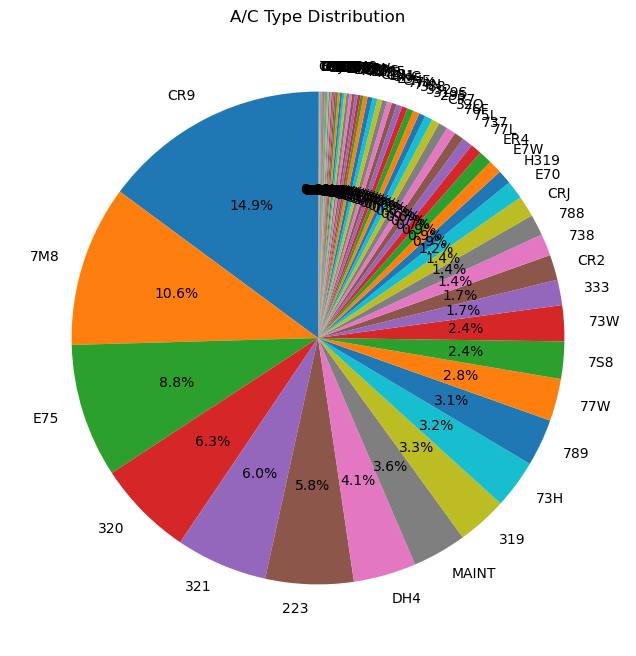

In [37]:
# Plot a pie chart for A/C Type
ac_type_counts = data['A/C Type'].value_counts()
ac_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), legend=False)
plt.title('A/C Type Distribution')
plt.ylabel('')
plt.show()

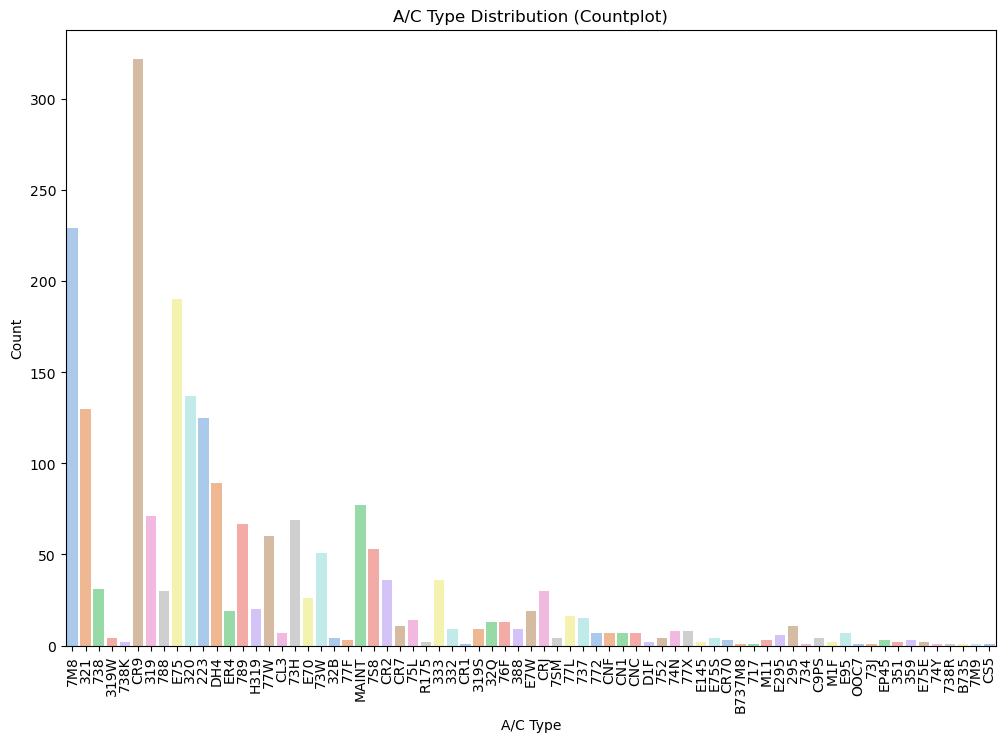

In [38]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='A/C Type', data=data, palette='pastel')
plt.title('A/C Type Distribution (Countplot)')
plt.xlabel('A/C Type')
plt.ylabel('Count')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

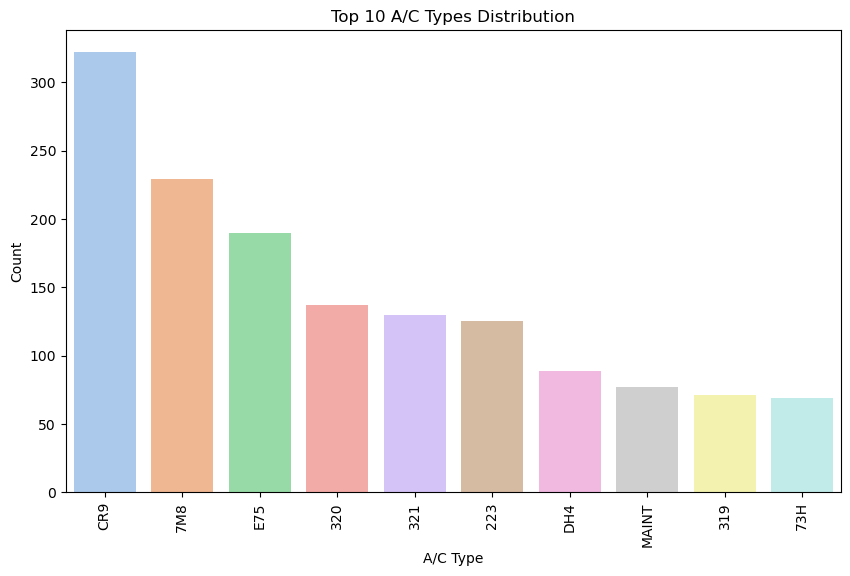

In [39]:
# Get the top ten A/C types
top_ac_types = data['A/C Type'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ac_types.index, y=top_ac_types.values, palette='pastel')
plt.title('Top 10 Aircraft fue')
plt.xlabel('A/C Type')
plt.ylabel('Count')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

In [40]:
# Calculate the total number of flights
total_flights = data['Flight No.'].count()

print(f'Total Number of Flights: {total_flights}')

Total Number of Flights: 2165


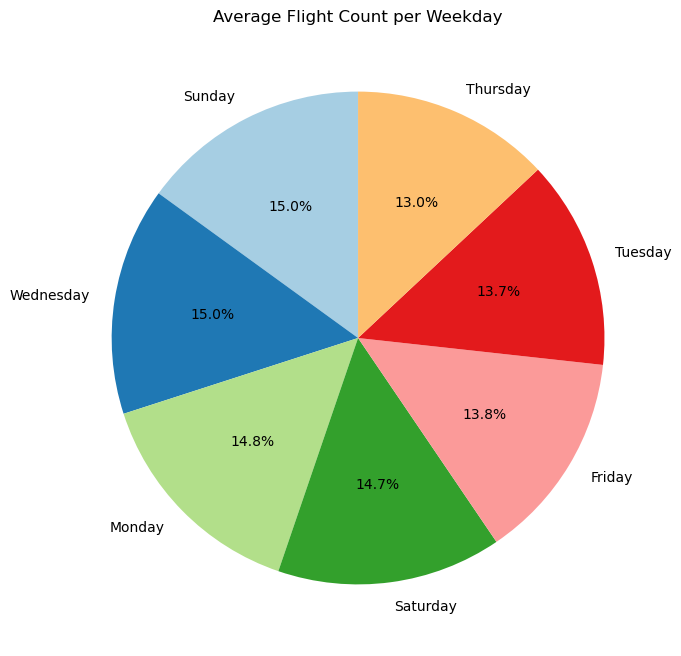

In [48]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract weekday from the 'Date' column
data['Weekday'] = data['Date'].dt.day_name()

# Calculate the average number of flights per weekday
average_flights_per_weekday = data.groupby('Weekday')['Flight No.'].count().mean()

# Plot a pie chart for average flight count per weekday
weekday_counts = data['Weekday'].value_counts()
weekday_average_counts = weekday_counts / len(data['Weekday'].unique())  # Calculate average counts

plt.figure(figsize=(8, 8))
plt.pie(weekday_average_counts, labels=weekday_average_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Flight Count per Weekday')
plt.show()


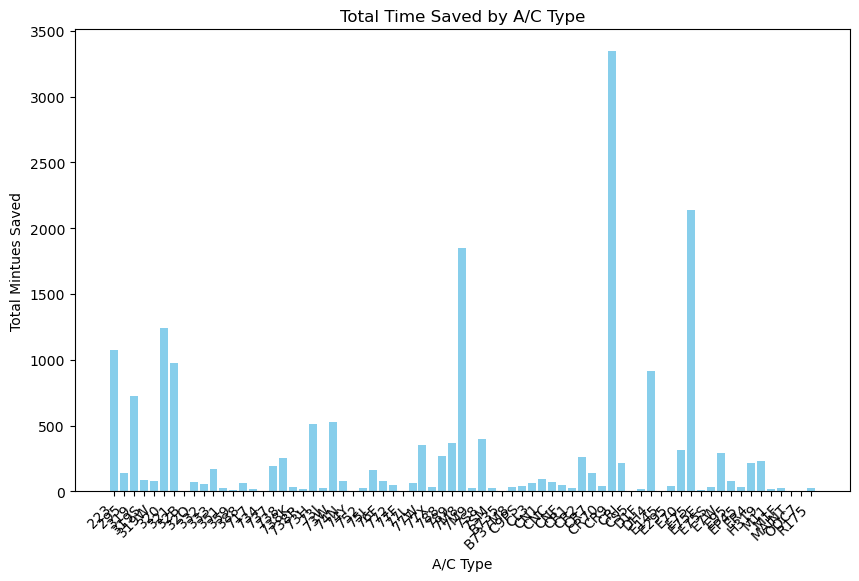

In [104]:
# Assuming your DataFrame is named 'data'

# Convert 'A/C Type' to strings
data['A/C Type'] = data['A/C Type'].astype(str)

# Convert to numeric, errors='coerce' will replace non-numeric values with NaN
data['Total Mintues Saved'] = pd.to_numeric(data['Total Mintues Saved'], errors='coerce')

# Replace NaN values with 0
data['Total Mintues Saved'].fillna(0, inplace=True)

# Replace negative values with 0
data['Total Mintues Saved'] = data['Total Mintues Saved'].clip(lower=0)

# Calculate total time saved for each A/C type
total_time_saved = data.groupby('A/C Type')['Total Mintues Saved'].sum().reset_index()

# Plot a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_time_saved['A/C Type'], total_time_saved['Total Mintues Saved'], color='skyblue')
plt.title('Total Time Saved by A/C Type')
plt.xlabel('A/C Type')
plt.ylabel('Total Mintues Saved')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

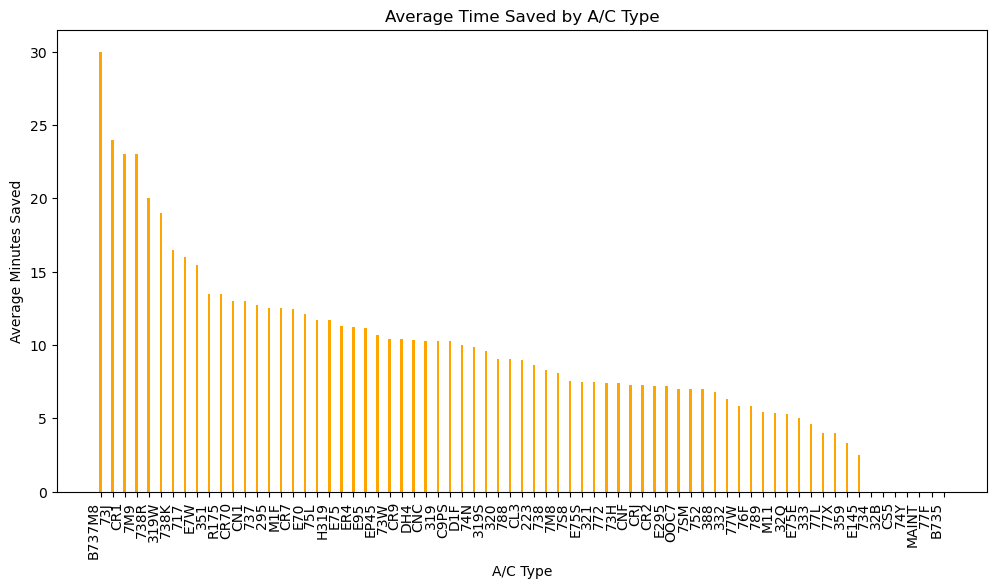

In [111]:
# Convert 'A/C Type' to strings
data['A/C Type'] = data['A/C Type'].astype(str)

# Convert to numeric, errors='coerce' will replace non-numeric values with NaN
data['Total Mintues Saved'] = pd.to_numeric(data['Total Mintues Saved'], errors='coerce')

# Replace NaN values with 0
data['Total Mintues Saved'].fillna(0, inplace=True)

# Calculate average time saved for each A/C type and sort by average minutes saved
average_time_saved = data.groupby('A/C Type')['Total Mintues Saved'].mean().reset_index()
average_time_saved = average_time_saved.sort_values('Total Mintues Saved', ascending=False)

# Plot a bar plot with adjusted width and order
plt.figure(figsize=(12, 6))
plt.bar(average_time_saved['A/C Type'], average_time_saved['Total Mintues Saved'], color='orange', width=0.2)
plt.title('Average Time Saved by A/C Type')
plt.xlabel('A/C Type')
plt.ylabel('Average Minutes Saved')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [113]:
# Count occurrences of 'Terminal 1' and 'Terminal 3' in the 'location' column
terminal_1_count = data['Location'].str.count('Terminal 1').sum()
terminal_3_count = data['Location'].str.count('Terminal 3').sum()

print(f'Terminal 1 count: {terminal_1_count}')
print(f'Terminal 3 count: {terminal_3_count}')

Terminal 1 count: 1204.0
Terminal 3 count: 747.0
